In [1]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
import Diffrapy as df
import matplotlib.cm as cm
from tqdm import tqdm

from readgssi import readgssi

In [2]:
sc=120 #value for static correction, change accordingly

hdr, arr, gps = readgssi.readgssi(infile="Data/GPR_files/FILE____172_bruto.DZT",zero=[sc])

data = arr[0]
A = arr[0]
cdp1=A

ntime=hdr['shape'][0] - sc
ntrace=hdr['shape'][1]
#dt=hdr['sec']/ntime

nx = ntrace
nz = ntime
dx = 0.0025   #m, found in the import.rep file, not sure how to obtain this value from readgssi...
dt = 0.0195   #ns, found in the import.rep file, not sure how to obtain this value from readgssi...

2024-05-03 13:39:43 - WARNING: no DZG file found for GPS input
2024-05-03 13:39:43 - WARNING: could not find DZX file to read metadata. Trying to read array for marks...
2024-05-03 13:39:43 - DZT marks read successfully. marks: 8
2024-05-03 13:39:43 -                             traces: [0, 40, 80, 120, 160, 200, 240, 280]
--------------------WARNING - PLEASE READ---------------------
2024-05-03 13:39:43 - WARNING: could not read frequency for antenna name "'2.6GHz'"
2024-05-03 13:39:43 - WARNING: trying to use frequencies of 2 MHz (estimated)...
2024-05-03 13:39:43 - more info: rh_ant=['2.6GHz', None, None, None]
2024-05-03 13:39:43 -            known_ant=[False, None, None, None]
2024-05-03 13:39:43 - please submit a bug report with this warning, the antenna name and frequency
2024-05-03 13:39:43 - at https://github.com/iannesbitt/readgssi/issues/new
2024-05-03 13:39:43 - or send via email to ian (dot) nesbitt (at) gmail (dot) com.
2024-05-03 13:39:43 - if possible, please attach a Z

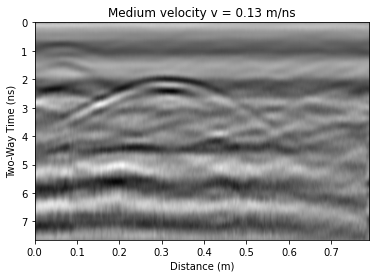

In [3]:
plt.imshow(cdp1,aspect='auto',interpolation='bicubic', cmap=plt.cm.gray_r,extent=[0*dx, ntrace*dx, ntime*dt, 0*dt])

plt.title('Medium velocity v = 0.13 m/ns')
plt.xlabel('Distance (m)')
plt.ylabel('Two-Way Time (ns)')

plt.show()

In [27]:
c=0.16 # obtained from Reflex migration

In [28]:
from tqdm import tqdm

nx=ntrace
nz=ntime
dxtrace = dx
nz = ntime
t_total = ntime*dt
z_total = (c*t_total)/2 # m
dz = z_total/nz
#dz = 0.0012675  # m

time_table = np.zeros([ntrace,nz,nx]) 

In [29]:
print(np.shape(time_table))

(316, 392, 316)


In [30]:
print(np.shape(cdp1))
#392 linhas nz, 316 colunas ntrace

(392, 316)


In [31]:
for ixtrace in tqdm(range(0,ntrace)): #posicao do GPR
    for ixs in range(0,nx): # coord x no modelo, trocar ixs pq ñ é tiro
        for izs in range(0,nz): #coord z no modelo 
            r = np.sqrt((izs*dz)**2 + (ixtrace*dxtrace - ixs*dx)**2) 
            if r!=0:
                time_table[ixtrace,izs,ixs]=2*(r/c) #considering the two-way travel time
            elif r==0:
                time_table[ixtrace,izs,ixs]=1e-10 #small number to avoid divising by 0
                
print(np.shape(time_table))

with open("Data/GPR_files/tt_gpr", "wb") as f: 
    np.save(f, time_table)

100%|████████████████████████████████████████████████████████████████████████████████| 316/316 [01:49<00:00,  2.90it/s]


(316, 392, 316)


In [23]:
with open("Data/GPR_files/tt_gpr", "rb") as f:
    time_table = np.load(f)

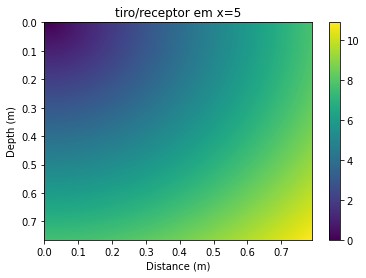

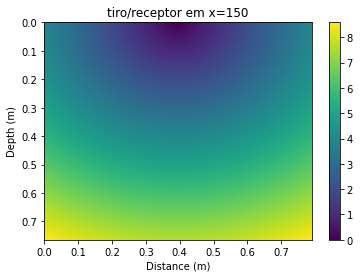

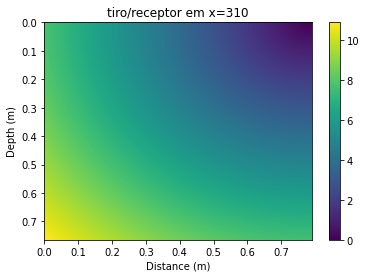

In [10]:
plt.imshow(time_table[5,:,:],aspect="auto",interpolation='bicubic',extent=[0*dx, ntrace*dx, nz*dz, 0*dz])
plt.title("tiro/receptor em x=5")
plt.xlabel("Distance (m)")
plt.ylabel("Depth (m)")
plt.colorbar()
plt.show()

plt.imshow(time_table[int(ntrace/2-1),:,:],aspect="auto",interpolation='bicubic',extent=[0*dx, ntrace*dx, nz*dz, 0*dz])
plt.title("tiro/receptor em x=150")
plt.xlabel("Distance (m)")
plt.ylabel("Depth (m)")
plt.colorbar()
plt.show()

plt.imshow(time_table[-5,:,:],aspect="auto",interpolation='bicubic',extent=[0*dx, ntrace*dx, nz*dz, 0*dz])
plt.title("tiro/receptor em x=310")
plt.xlabel("Distance (m)")
plt.ylabel("Depth (m)")
plt.colorbar()
plt.show()

In [11]:
migdata_envelope = np.loadtxt("Data/GPR_files/FILE_172_migrated4.ASC")

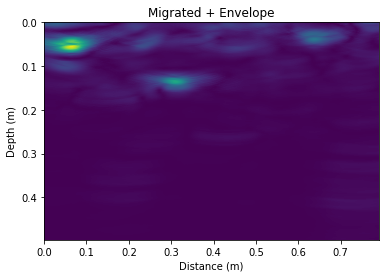

In [12]:
migdata_envelope = migdata_envelope[sc:,:] #considering the static correction

plt.imshow(migdata_envelope,aspect="auto",extent=[0,ntrace*dx,z_total,0])
plt.title("Migrated + Envelope")
plt.xlabel('Distance (m)')
plt.ylabel('Depth (m)')
plt.show()

In [13]:
pmin = -1 #45 graus
pmax = 1
dp = 0.2
xwin=zwin=5
x_ini=z_ini=0

#pm,sm = df.local_window(migdata_envelope,xwin,zwin,x_ini,z_ini,dx,dz,pmin,pmax,dp)
#
#with open("Data/GPR_files/pm", "wb") as f: 
#    np.save(f, pm)
#    
#with open("Data/GPR_files/sm", "wb") as f: 
#    np.save(f, sm)

In [14]:
with open("Data/GPR_files/pm", "rb") as f:
    pm = np.load(f)

with open("Data/GPR_files/sm", "rb") as f:
    sm = np.load(f)

Alguma coisa está dando errado aqui, essas imagens estão ficando muito esquisitas... Normalmente fica algo bem parecido com a imagem migrada original

Será que a mudança de segundos pra nanosegundos faz essa confusão nas funções? 

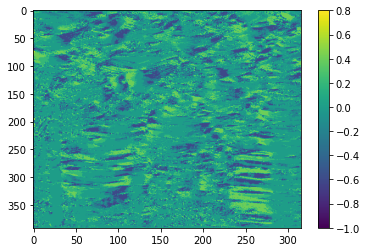

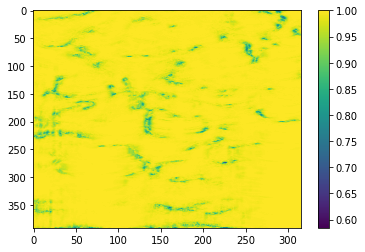

In [15]:
plt.imshow(pm,aspect="auto")
plt.colorbar()

plt.show()

plt.imshow(sm,aspect="auto")
plt.colorbar()
plt.show()

In [16]:
m_theta = np.arctan(pm)
X = np.sin(m_theta)
Y = np.cos(m_theta)

definindo constantes para a migração

In [14]:
dwin=dt
win=5*dt #Time Window
app_ref=10 #Aperture for conventional migration
app_dif=20 #Aperture for diffraction migration

gather1 = cdp1
isx = 0 #o que eu faço aqui? como é common offset, não tem isx

******

### O grande desafio está aqui!


In [28]:
def gprKirchhoffMigration(gather,isx,dx,dz,dt,win,dwin,app_ref,app_dif,time_table,X,Y,sm):
    
    gather = np.array(gather)
    gather = df.phase_shift(gather)

    timer=time_table

    window = np.arange(-win,win,dwin)
    [nt,ntr]=gather.shape
    [ntr2,nz,nx]=timer.shape
    if ntr!=ntr2:
        print('Gather and traveltime table have different trace numbers')
        
    refl_mig = np.zeros([nz,nx])
    diff_mig = np.zeros([nz,nx])

    IX = np.arange(0,nx*dx,dx)
    IZ = np.arange(0,nz*dz,dz)
    [IIX,IIZ] = np.meshgrid(IX,IZ)
    
    # Loop over each trace of the shot gather at src isx
    for igx in tqdm(range(0,ntr)):
        
        #w = df.peso(time_table,dt,X,Y,igx,isx) #**vou ter que mudar o isx? common-offset, olhar como calculo essas funções...
        w = df.peso(time_table,dt,X,Y,igx,igx)
        w_reff = np.abs(w) #(w**2)#*(sm)
        w_diff = np.abs(1 - np.abs(w))#(1-(w**2))
        
        trace_reflwin = np.zeros([nz,nx])
        trace_diffwin = np.zeros([nz,nx])
        
        ################################################
        ################################################
        ### MUDAR AQUI PARA CONSIDERAR COMMON-OFFSET ###
        #R = np.sqrt(IIZ**2 + (IIX-(igx+isx)/2*dx)**2)
        #r = np.sqrt((ixtrace*dx-ixs*dx)**2+(izs*dz)**2)
        R = np.sqrt(IIZ**2 + (IIX - igx*dx)**2) #tá certo?
        ################################################
        ################################################
        
        r_mask = (R==0)
        R[r_mask]= dx/1000
        obli = IIZ/R
        #trace_appref = df.taper(ntr,nz,app_ref,isx,igx)
        #trace_appdif = df.taper(ntr,nz,app_dif,isx,igx)
        trace_appref = df.taper(ntr,nz,app_ref,igx,igx)
        trace_appdif = df.taper(ntr,nz,app_dif,igx,igx)

        for j in range(len(window)): # somar amplitudes da curva de difração com uma janela 
            ###########################################
            ######## aqui vou ter que trocar ##########
            #t = timer[isx,0:nz,0:nx] + timer[igx,0:nz,0:nx] #t_{d}
            t = timer[igx,0:nz,0:nx] #t_{d}, já considero o double travel time
            ###########################################
            twin = t + window[j]
            t2 = (twin<nt)*twin 
            trace1=gather.T[np.ix_([igx],t2.flatten().astype(np.int32))] 
            trace_refl1 = trace1.reshape([nz,nx])*(w_reff)
            trace_diff1 = trace1.reshape([nz,nx])*(w_diff)
            trace_refl = trace_refl1*trace_appref
            trace_diff = trace_diff1*trace_appdif
            trace_reflwin = trace_reflwin + trace_refl
            trace_diffwin = trace_diffwin + trace_diff

        refl_mig[0:nz,0:nx] = refl_mig[0:nz,0:nx] + trace_reflwin*obli
        diff_mig[0:nz,0:nx] = diff_mig[0:nz,0:nx] + trace_diffwin*obli
        
    return refl_mig,diff_mig

Para testar a migração, é só rodar essa célula

100%|████████████████████████████████████████████████████████████████████████████████| 316/316 [06:02<00:00,  1.15s/it]


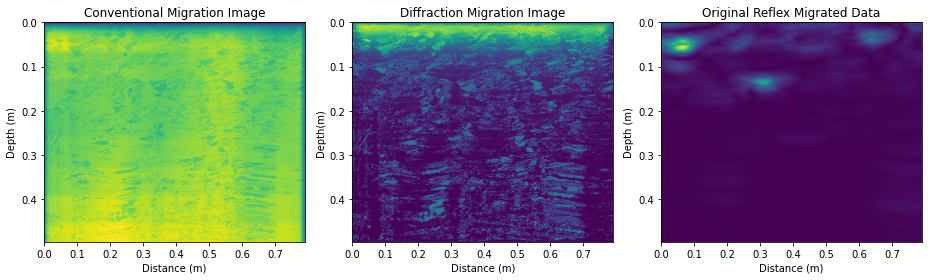

In [29]:
refl,diff = gprKirchhoffMigration(cdp1,isx,dx,dz,dt,win,dwin,app_ref,app_dif,time_table,X,Y,sm)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(13,4))

ax1.imshow(refl, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax1.set_title("Conventional Migration Image")
ax1.set_xlabel("Distance (m)")
ax1.set_ylabel("Depth (m)")

ax2.imshow(diff, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax2.set_title("Diffraction Migration Image")
ax2.set_xlabel("Distance (m)")
ax2.set_ylabel("Depth(m)")

ax3.imshow(migdata_envelope, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax3.set_title("Original Reflex Migrated Data")
ax3.set_xlabel("Distance (m)")
ax3.set_ylabel("Depth (m)")

plt.tight_layout()
plt.show()

### Testando sem os pesos pra ver como fica...

Também estou desconsiderando as correções (phase_shift, taper...)

In [24]:
dwin=dt
win=5*dt #Time Window in seconds
app_ref=1 #Aperture for conventional migration

In [32]:
def TESTEgprKirchhoffMigration(gather,dx,dz,dt,win,dwin,app_ref,app_dif,time_table):
    
    gather = np.array(gather)
    #gather = df.phase_shift(gather)

    timer=time_table

    window = np.arange(-win,win,dwin)
    [nt,ntr]=gather.shape
    [ntr2,nz,nx]=timer.shape
    if ntr!=ntr2:
        print('Gather and traveltime table have different trace numbers')
        
    refl_mig = np.zeros([nz,nx])

    IX = np.arange(0,nx*dx,dx)
    IZ = np.arange(0,nz*dz,dz)
    [IIX,IIZ] = np.meshgrid(IX,IZ)
    
    # Loop over each trace of the shot gather at src isx
    for igx in tqdm(range(0,ntr)):
     
        trace_reflwin = np.zeros([nz,nx])
        
        ################################################
        ################################################
        ######### Mudar para common offset aqui ########
        #R = np.sqrt(IIZ**2 + (IIX-(igx+isx)/2*dx)**2)
        #r = np.sqrt((ixtrace*dx-ixs*dx)**2+(izs*dz)**2)
        R = np.sqrt(IIZ**2 + (IIX - igx*dx)**2) #tá certo?
        ################################################
        ################################################
        
        r_mask = (R==0)
        R[r_mask]= dx/1000
        obli = IIZ/R
        #trace_appref = df.taper(ntr,nz,app_ref,igx,igx)

        for j in range(len(window)): # somar amplitudes da curva de difração com uma janela 
            
            ###########################################
            ######## aqui vou ter que trocar ##########
            #t = timer[isx,0:nz,0:nx] + timer[igx,0:nz,0:nx] #t_{d}
            t = timer[igx,0:nz,0:nx] #t_{d}, já considero o two way travel time
            ###########################################
            
            twin = t + window[j]
            tgrid = twin/dt
            nt=nz
            #print(nt)
            t2 = (tgrid<nt)*tgrid
            
            #print(tgrid[0],"\n")
            trace1=gather.T[np.ix_([igx],t2.flatten().astype(np.int64))] #Será que o problema está aqui?
            trace_refl1 = trace1.reshape([nz,nx])#*(w)
            #trace_refl = trace_refl1#*trace_appref
            trace_reflwin = trace_reflwin + trace_refl1

        refl_mig[0:nz,0:nx] = refl_mig[0:nz,0:nx] + trace_reflwin#*obli
        
    return refl_mig

100%|████████████████████████████████████████████████████████████████████████████████| 316/316 [00:09<00:00, 33.44it/s]


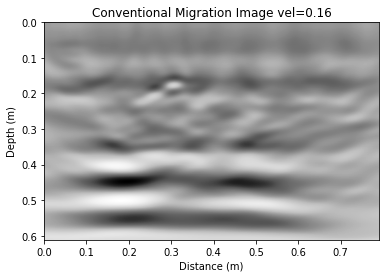

In [35]:
mig = TESTEgprKirchhoffMigration(cdp1,dx,dz,dt,win,dwin,app_ref,app_dif,time_table)

plt.imshow(mig,aspect="auto",cmap="Greys",extent=[0,dx*nx,dz*nz,0])
plt.title(f"Conventional Migration Image vel={c}")
plt.xlabel("Distance (m)")
plt.ylabel("Depth (m)")

plt.show()

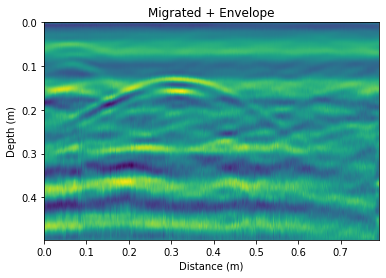

In [47]:
plt.imshow(cdp1,aspect="auto",extent=[0,ntrace*dx,z_total,0])
plt.title("Migrated + Envelope")
plt.xlabel('Distance (m)')
plt.ylabel('Depth (m)')
plt.show()

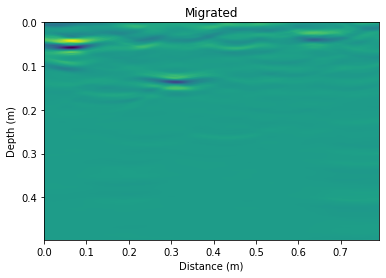

In [75]:
migdata = np.loadtxt("Data/GPR_files/FILE_172_migrated3.ASC")
migdata = migdata[sc:,:]

plt.imshow(migdata,aspect="auto",extent=[0,ntrace*dx,z_total,0])
plt.title("Migrated")
plt.xlabel('Distance (m)')
plt.ylabel('Depth (m)')
plt.show()

E se eu tentar migrar a seção já processada? Será que melhora um pouco?

Talvez pensar em como fazer esse processamento básico por dentro do readgssi. Os principais passos são o Static Correction (que ele já faz), Remove Header Gain (não sei se faz) e Backgrund Removal (não sei se faz). A ideia é ter todo o workflow dentro do python, e não depender do Reflex pra pré-processar o dado.

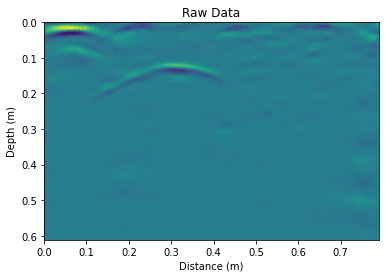

In [36]:
migdata_processed = np.loadtxt("Data/GPR_files/FILE_172_BRUTOprocessed.ASC")

plt.imshow(migdata_processed,aspect="auto",extent=[0,ntrace*dx,z_total,0])
plt.title("Raw Data")
plt.xlabel('Distance (m)')
plt.ylabel('Depth (m)')
plt.show()

In [46]:
c = 0.16 #m/ns

[nz_p,nx_p] = np.shape(migdata_processed)
ntrace_p = nx_p

t_total = nz_p*dt
z_total = (c*t_total)/2 # m
dz = z_total/nz
print(dz)

0.0014366326530612244


In [47]:
time_table_p = np.zeros([ntrace_p,nz_p,nx_p]) 

for ixtrace in tqdm(range(0,ntrace_p)): #posicao do GPR
    for ixs in range(0,nx_p): # coord x no modelo, trocar ixs pq ñ é tiro
        for izs in range(0,nz_p): #coord z no modelo 
            r = np.sqrt((izs*dz)**2 + (ixtrace*dxtrace - ixs*dx)**2) 
            if r!=0:
                time_table_p[ixtrace,izs,ixs]=2*(r/c) #considering the two-way travel time
            elif r==0:
                time_table_p[ixtrace,izs,ixs]=1e-10 #small number to avoid divising by 0
            elif r<0:
                time_table_p[ixtrace,izs,ixs]=1e-10 #small number to avoid divising by 0
                print("negative time values?")

100%|████████████████████████████████████████████████████████████████████████████████| 316/316 [01:58<00:00,  2.68it/s]


In [57]:
dwin=dt
win=5*dt #Time Window in seconds
app_ref=5 #Aperture for conventional migration

def TESTE2gprKirchhoffMigration(gather,dx,dz,dt,win,dwin,app_ref,app_dif,time_table):
    
    gather = np.array(gather)
    gather = df.phase_shift(gather)

    timer=time_table

    window = np.arange(-win,win,dwin)
    [nt,ntr]=gather.shape
    [ntr2,nz,nx]=timer.shape
    if ntr!=ntr2:
        print('Gather and traveltime table have different trace numbers')
        
    refl_mig = np.zeros([nz,nx])

    IX = np.arange(0,nx*dx,dx)
    IZ = np.arange(0,nz*dz,dz)
    [IIX,IIZ] = np.meshgrid(IX,IZ)
    
    # Loop over each trace of the shot gather at src isx
    for igx in tqdm(range(0,ntr)):
     
        trace_reflwin = np.zeros([nz,nx])
        
        ################################################
        ################################################
        ######### Mudar para common offset aqui ########
        #R = np.sqrt(IIZ**2 + (IIX-(igx+isx)/2*dx)**2)
        #r = np.sqrt((ixtrace*dx-ixs*dx)**2+(izs*dz)**2)
        R = np.sqrt(IIZ**2 + (IIX - igx*dx)**2) #tá certo?
        ################################################
        ################################################
        
        r_mask = (R==0)
        R[r_mask]= dx/1000
        obli = IIZ/R
        trace_appref = df.taper(ntr,nz,app_ref,igx,igx)

        for j in range(len(window)): # somar amplitudes da curva de difração com uma janela 
            
            ###########################################
            ######## aqui vou ter que trocar ##########
            #t = timer[isx,0:nz,0:nx] + timer[igx,0:nz,0:nx] #t_{d}
            t = timer[igx,0:nz,0:nx] #t_{d}, já considero o two way travel time
            ###########################################
            
            twin = t + window[j]
            tgrid = twin/dt
            nt=nz
            #print(nt)
            t2 = (tgrid<nt)*tgrid
            
            #print(tgrid[0],"\n")
            trace1=gather.T[np.ix_([igx],t2.flatten().astype(np.int64))] #Será que o problema está aqui?
            trace_refl1 = trace1.reshape([nz,nx])#*(w)
            trace_refl = trace_refl1*trace_appref
            trace_reflwin = trace_reflwin + trace_refl1

        refl_mig[0:nz,0:nx] = refl_mig[0:nz,0:nx] + trace_reflwin*obli
        
    return refl_mig

100%|████████████████████████████████████████████████████████████████████████████████| 316/316 [00:08<00:00, 36.47it/s]


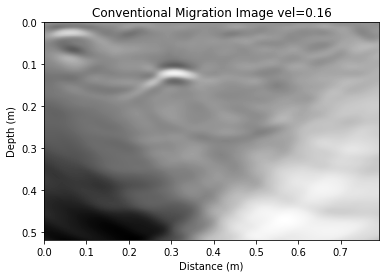

In [58]:
mig_p = TESTE2gprKirchhoffMigration(migdata_processed,dx,dz,dt,win,dwin,app_ref,app_dif,time_table_p)

plt.imshow(mig_p,aspect="auto",cmap="Greys",extent=[0,dx*nx_p,dz*nz_p,0])
plt.title(f"Conventional Migration Image vel={c}")
plt.xlabel("Distance (m)")
plt.ylabel("Depth (m)")

plt.show()

100%|████████████████████████████████████████████████████████████████████████████████| 316/316 [00:07<00:00, 41.22it/s]


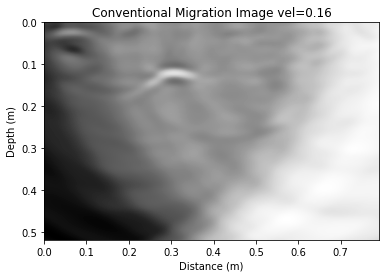

In [52]:
mig_p = TESTE2gprKirchhoffMigration(migdata_processed,dx,dz,dt,win,dwin,app_ref,app_dif,time_table_p)

plt.imshow(mig_p,aspect="auto",cmap="Greys",extent=[0,dx*nx_p,dz*nz_p,0])
plt.title(f"Conventional Migration Image vel={c}")
plt.xlabel("Distance (m)")
plt.ylabel("Depth (m)")

plt.show()

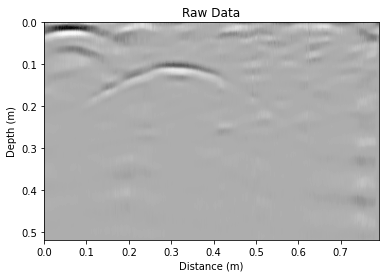

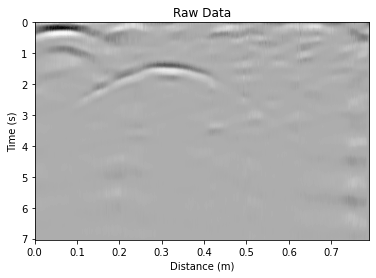

In [50]:
plt.imshow(migdata_processed,aspect="auto",cmap="Greys",extent=[0,dx*nx_p,dz*nz_p,0])
plt.title("Raw Data")
plt.xlabel('Distance (m)')
plt.ylabel('Depth (m)')
plt.show()

plt.imshow(migdata_processed,aspect="auto",cmap="Greys",extent=[0,dx*nx_p,dt*nz_p,0])
plt.title("Raw Data")
plt.xlabel('Distance (m)')
plt.ylabel('Time (s)')
plt.show()

Tentando aplicar o filtro pelo próprio readgssi (background removal e bandpass filter)

2024-05-03 15:08:31 - WARNING: no DZG file found for GPS input
2024-05-03 15:08:31 - WARNING: could not find DZX file to read metadata. Trying to read array for marks...
2024-05-03 15:08:31 - DZT marks read successfully. marks: 8
2024-05-03 15:08:31 -                             traces: [0, 40, 80, 120, 160, 200, 240, 280]
--------------------WARNING - PLEASE READ---------------------
2024-05-03 15:08:31 - WARNING: could not read frequency for antenna name "'2.6GHz'"
2024-05-03 15:08:31 - WARNING: trying to use frequencies of 2 MHz (estimated)...
2024-05-03 15:08:31 - more info: rh_ant=['2.6GHz', None, None, None]
2024-05-03 15:08:31 -            known_ant=[False, None, None, None]
2024-05-03 15:08:31 - please submit a bug report with this warning, the antenna name and frequency
2024-05-03 15:08:31 - at https://github.com/iannesbitt/readgssi/issues/new
2024-05-03 15:08:31 - or send via email to ian (dot) nesbitt (at) gmail (dot) com.
2024-05-03 15:08:31 - if possible, please attach a Z

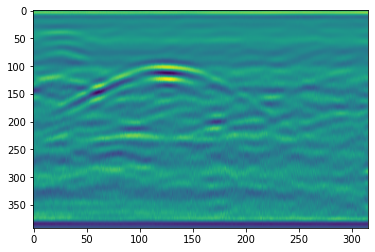

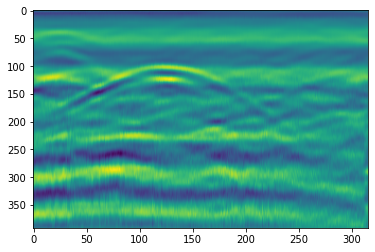

In [65]:
hdr1, arr1, gps1 = readgssi.readgssi(infile="Data/GPR_files/FILE____172_bruto.DZT",zero=[sc],bgr=0,freqmin=2450,freqmax=2750)
hdr, arr, gps = readgssi.readgssi(infile="Data/GPR_files/FILE____172_bruto.DZT",zero=[sc])

plt.imshow(arr1[0],aspect="auto")
plt.show()

plt.imshow(arr[0],aspect="auto")
plt.show()

In [66]:
cdp1 = arr1[0]
ntime=hdr1['shape'][0] - sc
ntrace=hdr1['shape'][1]

nx = ntrace
nz = ntime
dx = 0.0025   #m, found in the import.rep file, not sure how to obtain this value from readgssi...
dt = 0.0195   #ns, found in the import.rep file, not sure how to obtain this value from readgssi...

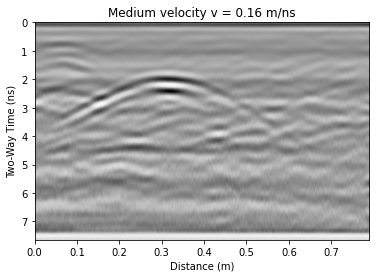

In [67]:
plt.imshow(cdp1,aspect='auto',interpolation='bicubic', cmap="Greys",extent=[0*dx, ntrace*dx, ntime*dt, 0*dt])

plt.title('Medium velocity v = 0.16 m/ns')
plt.xlabel('Distance (m)')
plt.ylabel('Two-Way Time (ns)')

plt.show()

In [69]:
c=0.16 #m/ns
nx=ntrace
nz=ntime
dxtrace = dx
t_total = ntime*dt
z_total = (c*t_total)/2 # m
dz = z_total/nz
#dz = 0.00156  # m

time_table = np.zeros([ntrace,nz,nx]) 

In [70]:
for ixtrace in tqdm(range(0,ntrace)): #posicao do GPR
    for ixs in range(0,nx): # coord x no modelo, trocar ixs pq ñ é tiro
        for izs in range(0,nz): #coord z no modelo 
            r = np.sqrt((izs*dz)**2 + (ixtrace*dxtrace - ixs*dx)**2) 
            if r!=0:
                time_table[ixtrace,izs,ixs]=2*(r/c) #considering the two-way travel time
            elif r==0:
                time_table[ixtrace,izs,ixs]=1e-10 #small number to avoid divising by 0

100%|████████████████████████████████████████████████████████████████████████████████| 316/316 [02:08<00:00,  2.46it/s]


In [75]:
migdata = np.loadtxt("Data/GPR_files/FILE_172_migrated3.ASC")
migdata = migdata[sc:,:]

In [76]:
pmin = -1 #45 graus
pmax = 1
dp = 0.2
xwin=zwin=5
x_ini=z_ini=0

pm,sm = df.local_window(migdata,xwin,zwin,x_ini,z_ini,dx,dz,pmin,pmax,dp)

100%|████████████████████████████████████████████████████████████████████████████████| 392/392 [01:13<00:00,  5.36it/s]


In [77]:
m_theta = np.arctan(pm)
X = np.sin(m_theta)
Y = np.cos(m_theta)

In [82]:
dwin=dt
win=5*dt #Time Window
app_ref=5 #Aperture for conventional migration
app_dif=5 #Aperture for diffraction migration

In [88]:
dwin=dt
win=5*dt #Time Window in seconds
app_ref=5 #Aperture for conventional migration

def TESTE2gprKirchhoffMigration(gather,dx,dz,dt,win,dwin,app_ref,app_dif,time_table,X,Y):
    
    gather = np.array(gather)
    gather = df.phase_shift(gather)

    timer=time_table

    window = np.arange(-win,win,dwin)
    [nt,ntr]=gather.shape
    [ntr2,nz,nx]=timer.shape
    if ntr!=ntr2:
        print('Gather and traveltime table have different trace numbers')
        
    refl_mig = np.zeros([nz,nx])
    diff_mig = np.zeros([nz,nx])

    IX = np.arange(0,nx*dx,dx)
    IZ = np.arange(0,nz*dz,dz)
    [IIX,IIZ] = np.meshgrid(IX,IZ)
    
    # Loop over each trace of the shot gather at src isx
    for igx in tqdm(range(0,ntr)):
        
        w = df.peso(time_table,dt,X,Y,igx,igx)
        w_reff = (w**2)#*(sm)
        w_diff = (1-(w**2))
     
        trace_reflwin = np.zeros([nz,nx])
        trace_diffwin = np.zeros([nz,nx])
        
        R = np.sqrt(IIZ**2 + (IIX - igx*dx)**2) #tá certo?
        r_mask = (R==0)
        R[r_mask]= dx/1000
        obli = IIZ/R
        
        trace_appref = df.taper(ntr,nz,app_ref,igx,igx)
        trace_appdif = df.taper(ntr,nz,app_dif,isx,igx)

        for j in range(len(window)): # somar amplitudes da curva de difração com uma janela 

            t = timer[igx,0:nz,0:nx] #t_{d}, já considero o two way travel time
            
            twin = t + window[j]
            tgrid = twin/dt
            nt=nz
            t2 = (tgrid<nt)*tgrid
            trace1=gather.T[np.ix_([igx],t2.flatten().astype(np.int64))] #Será que o problema está aqui?
            
            trace_refl1 = trace1.reshape([nz,nx])*(w_reff)
            trace_diff1 = trace1.reshape([nz,nx])*(w_diff)
            trace_refl = trace_refl1*trace_appref
            trace_diff = trace_diff1*trace_appdif
            trace_reflwin = trace_reflwin + trace_refl1
            trace_diffwin = trace_diffwin + trace_diff
            
        refl_mig[0:nz,0:nx] = refl_mig[0:nz,0:nx] + trace_reflwin*obli
        diff_mig[0:nz,0:nx] = diff_mig[0:nz,0:nx] + trace_diffwin*obli
        
    return refl_mig,diff_mig

100%|████████████████████████████████████████████████████████████████████████████████| 316/316 [06:04<00:00,  1.15s/it]


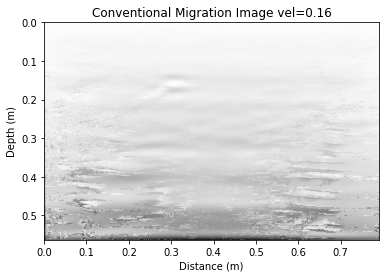

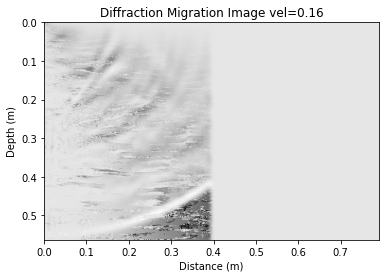

In [91]:
refl_mig,diff_mig = TESTE2gprKirchhoffMigration(cdp1,dx,dz,dt,win,dwin,app_ref,app_dif,time_table,X,Y)

plt.imshow(refl_mig,aspect="auto",cmap="Greys",extent=[0,dx*nx_p,dz*nz_p,0])
plt.title(f"Conventional Migration Image vel={c}")
plt.xlabel("Distance (m)")
plt.ylabel("Depth (m)")
plt.show()

plt.imshow(diff_mig,aspect="auto",cmap="Greys",extent=[0,dx*nx_p,dz*nz_p,0])
plt.title(f"Diffraction Migration Image vel={c}")
plt.xlabel("Distance (m)")
plt.ylabel("Depth (m)")
plt.show()

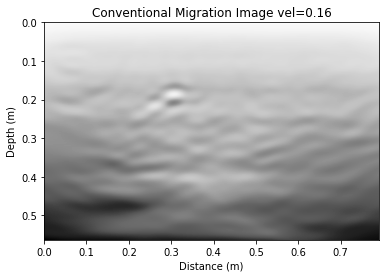

In [72]:
plt.imshow(np.abs(mig),aspect="auto",cmap="Greys",extent=[0,dx*nx_p,dz*nz_p,0])
plt.title(f"Conventional Migration Image vel={c}")
plt.xlabel("Distance (m)")
plt.ylabel("Depth (m)")

plt.show()